In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SelectFromModel
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [2]:
df = pd.read_csv('data.csv')

## Exploratory data analysis (EDA)

In [3]:
df.shape

(16857, 29)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     16857 non-null  object 
 1   equipment_energy_consumption  16013 non-null  object 
 2   lighting_energy               16048 non-null  object 
 3   zone1_temperature             15990 non-null  object 
 4   zone1_humidity                16056 non-null  object 
 5   zone2_temperature             16004 non-null  object 
 6   zone2_humidity                15990 non-null  float64
 7   zone3_temperature             16055 non-null  float64
 8   zone3_humidity                15979 non-null  float64
 9   zone4_temperature             16041 non-null  float64
 10  zone4_humidity                16076 non-null  float64
 11  zone5_temperature             16019 non-null  float64
 12  zone5_humidity                16056 non-null  float64
 13  z

In [5]:
df.describe()

,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,zone5_humidity,zone6_temperature,zone6_humidity,zone7_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
count,15990.000000,16055.000000,15979.000000,16041.000000,16076.000000,16019.000000,16056.000000,16009.000000,16010.000000,16063.000000,...,16084.000000,15969.000000,16051.000000,16015.000000,16058.000000,16029.000000,16042.000000,16031.000000,16031.000000,16033.000000
mean,39.494553,21.665733,38.201314,20.239922,37.945608,19.052613,50.289131,6.469934,59.162913,19.672472,...,18.851085,40.318199,6.218582,755.757602,78.977595,4.195988,38.457150,2.783507,24.854981,25.093780
std,10.129513,2.594309,10.144388,2.783050,10.769813,2.346158,18.722516,8.867993,52.657787,2.879815,...,2.528783,11.168678,7.554684,13.643585,28.565660,4.409729,21.318655,6.094732,26.214960,25.523631
min,-77.265503,6.543921,-71.406273,4.613485,-81.446225,5.921094,-141.640143,-42.987365,-353.393026,3.578021,...,4.476511,-81.582494,-37.524768,678.159940,-221.668765,-20.929527,-82.329792,-32.098095,-120.170177,-120.409590
25%,37.757500,20.533333,36.592500,19.266667,35.200000,18.061111,45.290000,2.930000,37.066667,18.500000,...,17.890000,38.230000,3.000000,750.800000,71.000000,2.000000,29.000000,0.450000,12.179924,12.193789
50%,40.293333,21.767500,38.400000,20.290000,38.090000,19.050000,48.854429,6.263333,62.766667,19.600000,...,18.890000,40.363333,6.000000,756.200000,84.166667,4.000000,40.000000,2.750000,24.866978,24.834261
75%,43.000000,22.760000,41.433333,21.356667,41.560833,20.100000,53.918333,9.690000,86.590000,21.000000,...,20.200000,43.790000,9.250000,762.100000,91.988095,6.000000,40.000000,5.308333,37.950236,37.971764
max,77.265503,36.823982,71.406273,35.921144,81.446225,32.157594,141.640143,55.932271,353.393026,35.712952,...,33.238012,81.582494,49.853906,833.392675,221.668765,29.318719,159.606156,37.673716,170.156325,170.329617


In [6]:
object_cols = df.select_dtypes(include='object').columns.tolist()
for col in object_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [7]:
df.drop(columns=['timestamp','random_variable2'], inplace=True)             

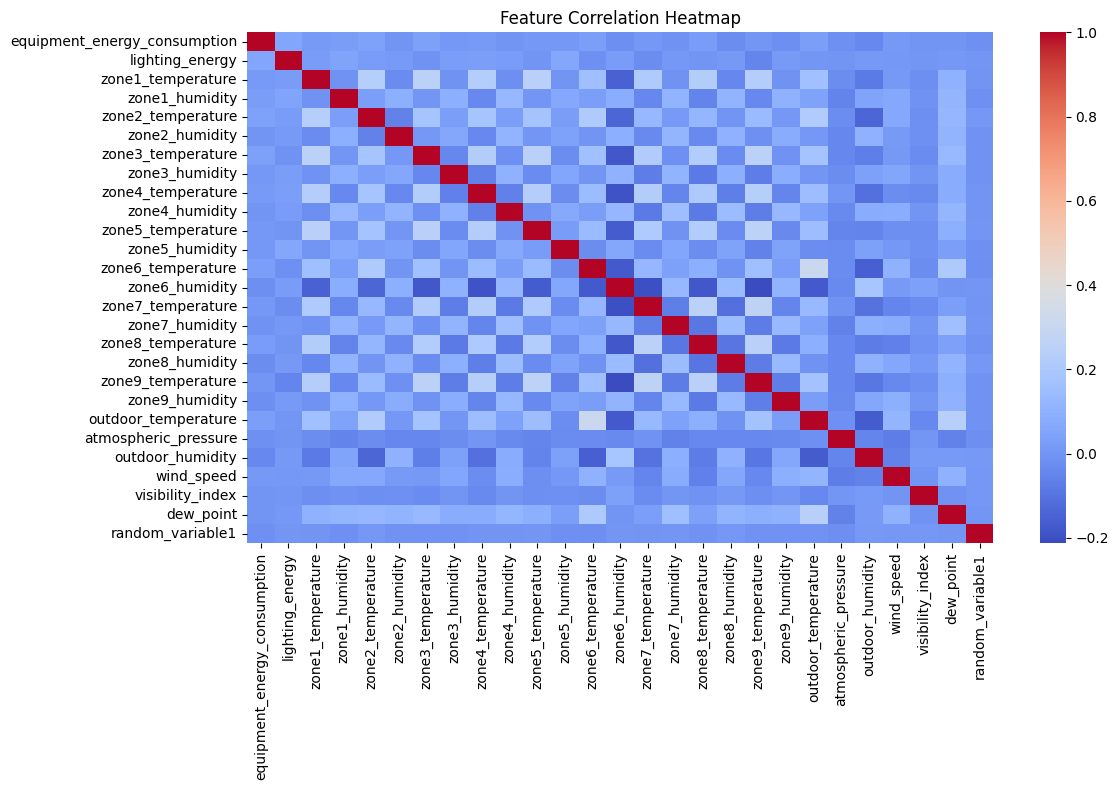

In [8]:
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()


In [9]:
target = 'equipment_energy_consumption'

In [10]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if col == 'timestamp':
            if df[col].isnull().sum() > len(df) * 0.5:
                df.drop('timestamp', axis=1, inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)

In [11]:
q1 = df[target].quantile(0.25)
q3 = df[target].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df[target] >= lower_bound) & (df[target] <= upper_bound)]
print(f"Removed outliers. New dataset shape: {df.shape}")

Removed outliers. New dataset shape: (14553, 27)


## Feature Engineering

In [12]:
df['total_energy'] = df[target] + df['lighting_energy']

## Model development and training

In [13]:
X = df.select_dtypes(include=['number']).drop([target], axis=1, errors='ignore')
y = df[target]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

Training set: (10914, 27), Test set: (3639, 27)


## Model evaluation and testing

In [15]:
rf_model = RandomForestRegressor(n_estimators=10,random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [16]:
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [17]:
print(f"\nRandomForestRegressor Performance:")
print(f"  RMSE: {rmse:.4f}")
print(f"  MAE: {mae:.4f}")
print(f"  R²: {r2:.4f}")


RandomForestRegressor Performance:
  RMSE: 0.9242
  MAE: 0.0808
  R²: 0.9988


In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

cv_scores_mae = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
positive_mae_scores = -cv_scores_mae
mean_mae = np.mean(positive_mae_scores)

print("Cross-Validation MAE Scores:", positive_mae_scores)
print("Mean MAE:", mean_mae)


Cross-Validation MAE Scores: [0.09115896 0.15437471 0.1113147  0.12276683 0.11228231]
Mean MAE: 0.11837950364725676


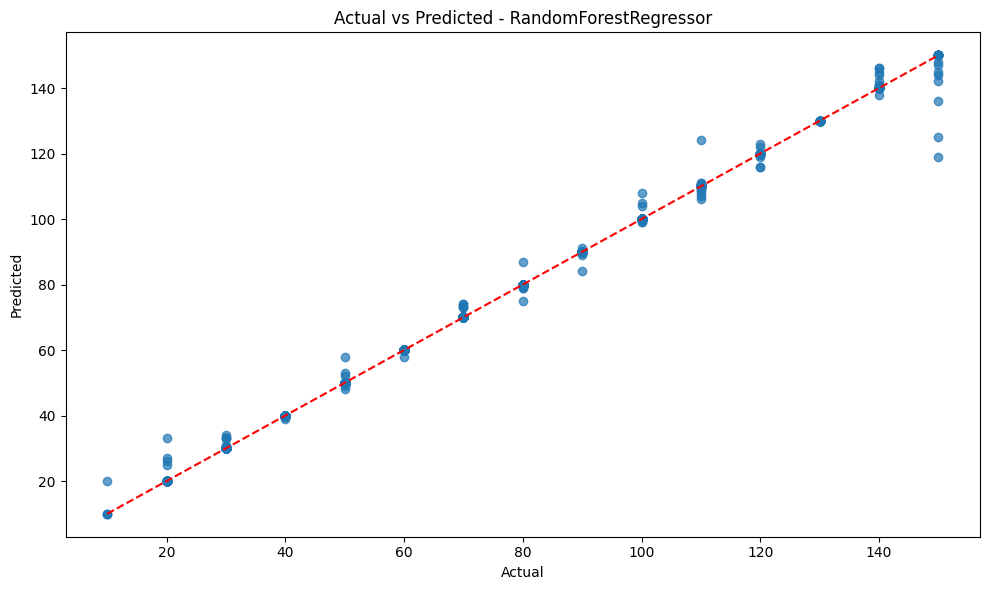

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - RandomForestRegressor')
plt.tight_layout()
plt.savefig('actual_vs_predicted_rf.png')
plt.show()